Initial Shape: (2930, 82)


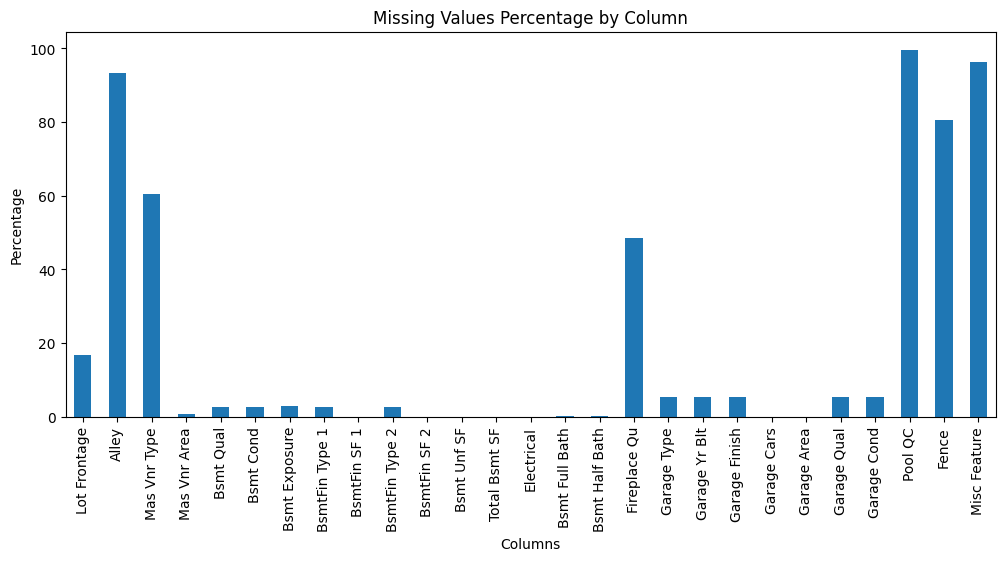

Columns Dropped: ['Alley', 'Mas Vnr Type', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature']
Shape after dropping columns: (2930, 76)
Total Missing Values After Cleaning: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 n

/tmp/ipython-input-1129764275.py:67: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-1129764275.py:74: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [1]:
# ================================
# Task 2: Data Cleaning & Missing Value Handling
# Dataset: House Prices / Medical Appointment No Shows
# Tools: Pandas, NumPy, Matplotlib
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ----------------
# 1. Load Dataset
# ----------------
# Change filename as per dataset you use

# For House Prices
df = pd.read_csv("AmesHousing.csv")

print("Initial Shape:", df.shape)
df.head()

# ------------------------------
# 2. Identify Missing Values
# ------------------------------
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Count": missing_count,
    "Missing Percentage": missing_percent
})

missing_df = missing_df[missing_df["Missing Count"] > 0]
missing_df.sort_values(by="Missing Percentage", ascending=False)

# ------------------------------
# 3. Visualize Missing Values
# ------------------------------
plt.figure(figsize=(12,5))
missing_df["Missing Percentage"].plot(kind="bar")
plt.title("Missing Values Percentage by Column")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()

# -----------------------------------------
# 4. Drop Columns with High Missing Values
# -----------------------------------------
threshold = 40  # percentage
cols_to_drop = missing_df[missing_df["Missing Percentage"] > threshold].index
df.drop(columns=cols_to_drop, inplace=True)

print("Columns Dropped:", list(cols_to_drop))
print("Shape after dropping columns:", df.shape)

# ------------------------------------
# 5. Separate Numerical & Categorical
# ------------------------------------
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

# ------------------------------------
# 6. Impute Numerical Columns
# ------------------------------------
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# ------------------------------------
# 7. Impute Categorical Columns
# ------------------------------------
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# -----------------------------
# 8. Validate After Cleaning
# -----------------------------
print("Total Missing Values After Cleaning:", df.isnull().sum().sum())
df.info()

# -----------------------------
# 9. Compare Before vs After
# -----------------------------
print("Final Shape:", df.shape)

# -----------------------------
# 10. Save Cleaned Dataset
# -----------------------------
df.to_csv("cleaned_dataset.csv", index=False)

print("✅ Cleaned dataset saved as cleaned_dataset.csv")


🧹 Task 2: Data Cleaning & Missing Value Handling

Objective

To clean real-world datasets by identifying, visualizing, and handling missing values using appropriate statistical techniques.

Dataset

House Prices (Ames Housing)

Steps Performed

Identify Missing Values
Missing values were identified using:

df.isnull().sum()

Visualize Missing Data
A bar chart was used to visualize missing value patterns and detect highly incomplete columns.

Remove Highly Missing Columns
Columns with more than 40% missing values were removed to improve data reliability.

Handle Numerical Missing Values
Missing values in numerical columns were filled using median imputation to reduce the impact of outliers.

Handle Categorical Missing Values
Missing values in categorical columns were filled using mode imputation.

Validate Cleaned Dataset
After cleaning, the dataset was validated to ensure no missing values remained.

Compare Before vs After
Dataset shape was compared before and after cleaning to assess data quality improvement.

Outcome

A clean, consistent dataset ready for analysis and modeling, with improved data quality and minimal data loss.

